# Example usage of Hpercomplex Convolutional NN

## Setup

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys

In [2]:
import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras import datasets, models
from tensorflow.keras import layers, activations, initializers
from tensorflow.python.framework import tensor_shape
from tensorflow.python.keras.engine.input_spec import InputSpec

import warnings
warnings.filterwarnings("ignore")

2024-06-30 15:12:00.762472: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-30 15:12:00.796185: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-30 15:12:00.796832: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-30 15:12:01.561813: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from HypercomplexKeras import Algebra
from HypercomplexKeras import Convolutional

We use [malaria](https://www.tensorflow.org/datasets/catalog/malaria) dataset:

In [4]:
import tensorflow_datasets as tfds
tfds.list_builders()
ds = tfds.load('malaria', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
#print(ds)

2024-06-30 15:12:02.970615: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


In [5]:
X = []
Y = []

i=0
for example in ds: 
    image = example["image"]
    label = example["label"]
    X.append(image)
    Y.append(label)  
    i += 1
    if i > 700:
        break
    
X = list(map(lambda image: tf.image.resize(image, (100, 100)),X))
X = np.array(X) 
Y = np.array(Y)

#plt.imshow(X[2])
#plt.show()

2024-06-30 15:12:04.228366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [4]
	 [[{{node Placeholder/_2}}]]
2024-06-30 15:12:04.229180: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [4]
	 [[{{node Placeholder/_3}}]]


Convert from RGB to ARGB for quaternions usage:

In [6]:
import tensorflow_io as tfio
X4 = tfio.experimental.color.rgb_to_rgba(X)
#DO abgr
X4 = tf.reverse(X4,[-1])


In [7]:
print(X.shape)
print(X4.shape)

(701, 100, 100, 3)
(701, 100, 100, 4)


2024-06-30 15:12:04.966418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [4]
	 [[{{node Placeholder/_4}}]]
2024-06-30 15:12:04.966831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [4]
	 [[{{node Placeholder/_4}}]]
2024-06-30 15:12:05.037449: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype uint8 and shape [130,118,3]
	

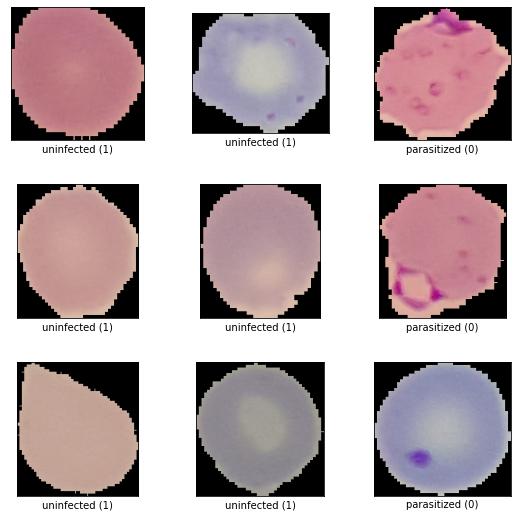

In [8]:
ds, info = tfds.load('malaria', split='train', with_info=True)
fig = tfds.show_examples(ds, info)


Check unique labels:

In [9]:
np.unique(Y)

array([0, 1])

Quantize labels:

In [10]:
idxY = np.logical_or(Y==0, Y == 1)

X_data = X4[idxY]
Y_data = Y[idxY]

print(X_data.shape)
print(Y_data.shape)

(701, 100, 100, 4)
(701,)


In [11]:
y_train = np.asarray(Y_data).astype('int').reshape((-1,1))
#y_train

# Deep Learning

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hyper_conv2d (HyperConv2D)  (None, 98, 98, 400)       4000      
                                                                 
 global_max_pooling2d (Globa  (None, 400)              0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 401       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 4,401
Trainable params: 4,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
16/16 [==============================] - 9s 570ms/step - loss: 8.8350 - accuracy: 0.5680 - val_loss: 1.6372 -

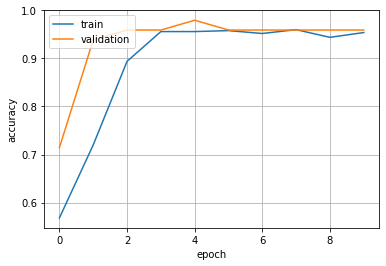

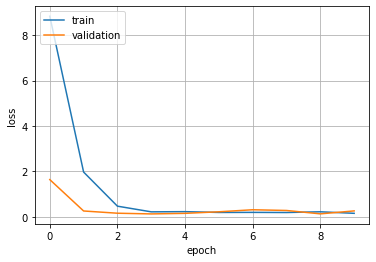

In [12]:
import Algebra
from HypercomplexKeras.Convolutional import HyperConv2D
from HypercomplexKeras.Hyperdense import HyperDense

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, GlobalMaxPooling2D, Dropout
from keras.layers import Dense, Activation, MaxPooling2D, Dropout, Flatten

#data:
x_train = tf.cast(X_data, tf.float32)[:500]
y_train = np.asarray(Y_data).astype('int').reshape((-1,1))[:500]


x_validate = tf.cast(X_data, tf.float32)[501:550]
y_validate = np.asarray(Y_data).astype('int').reshape((-1,1))[501:550]

x_test = tf.cast(X_data, tf.float32)[551:]
y_test = np.asarray(Y_data).astype('int').reshape((-1,1))[551:]


#create model (just play by (un)commenting various layers):
num_neurons = 100
hidden_dims = 20
model = Sequential()
model.add(HyperConv2D(num_neurons, (3,3)))
#model.add(HyperDense(hidden_dims))
#model.add(HyperConv2D(hidden_dims, (3,3)))
#model.add(Activation('tanh'))
#model.add(Flatten())
model.add(GlobalMaxPooling2D())
#model.add(MaxPooling2D())
#model.add(Dense(hidden_dims))
#model.add(Activation('tanh'))
#model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.predict(x_train, verbose=0)

model.summary()


opt = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


history = model.fit(x_train, y_train, validation_data=(x_validate, y_validate), epochs=10, verbose=1)



print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=10)
print("evaluation = ", results)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.savefig("accuracy.png")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.savefig("loss.png")
plt.show()


